In [4]:
#!/usr/local/bin/python3
from PIL import Image
from os import listdir
from os.path import isfile, join

mypath = 'extracted_pictures/'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
onlyfiles = [f for f in onlyfiles if not "pixelated" in f]
print(onlyfiles)

def crop_and_pixelate(filename):
    
    img = Image.open(mypath +filename)
    area = (600, 200, 1400, 1000)
    cropped_img = img.crop(area)
    # Resize smoothly down to 16x16 pixels
    imgSmall = img.resize((128,128),resample=Image.BILINEAR)

    # Scale back up using NEAREST to original size
    imgSmall = imgSmall.resize((1000,700),Image.NEAREST)


    thresh = 200
    fn = lambda x : 255 if x > thresh else 0
    r = imgSmall.convert('L').point(fn, mode='1')

    # Save

    r.save(mypath+filename.split('.')[0]+"_pixelated.png")
    return r


['out19.png', 'out9.png', 'out14.png', 'out21.png', 'out10.png', 'out22.png', 'out20.png', 'out5.png', 'out11.png', 'out8.png', 'out18.png', 'out17.png', 'out16.png', 'out6.png', 'out4.png', 'out15.png', 'out7.png', 'out12.png', 'out3.png', 'out1.png', 'out2.png', 'out13.png']


In [14]:
r = crop_and_pixelate('out19.png')

In [20]:
r.size

(1000, 700)

In [37]:
pixdata = r.load()
for y in range(r.size[1]):
    for x in range(r.size[0]):
        if pixdata[x, y] == 0:
            pixdata[x, y] = 1
r.show()

In [12]:
for f in onlyfiles:
    crop_and_pixelate(f)

In [30]:

import numpy as np

# Open input image
img = Image.open('extracted_pictures/out10_pixelated.png').convert('RGB')

In [31]:
img.show()

In [52]:
pixels = img.load() # create the pixel map

npa.shape

(700, 1000, 3)

[  0 255]


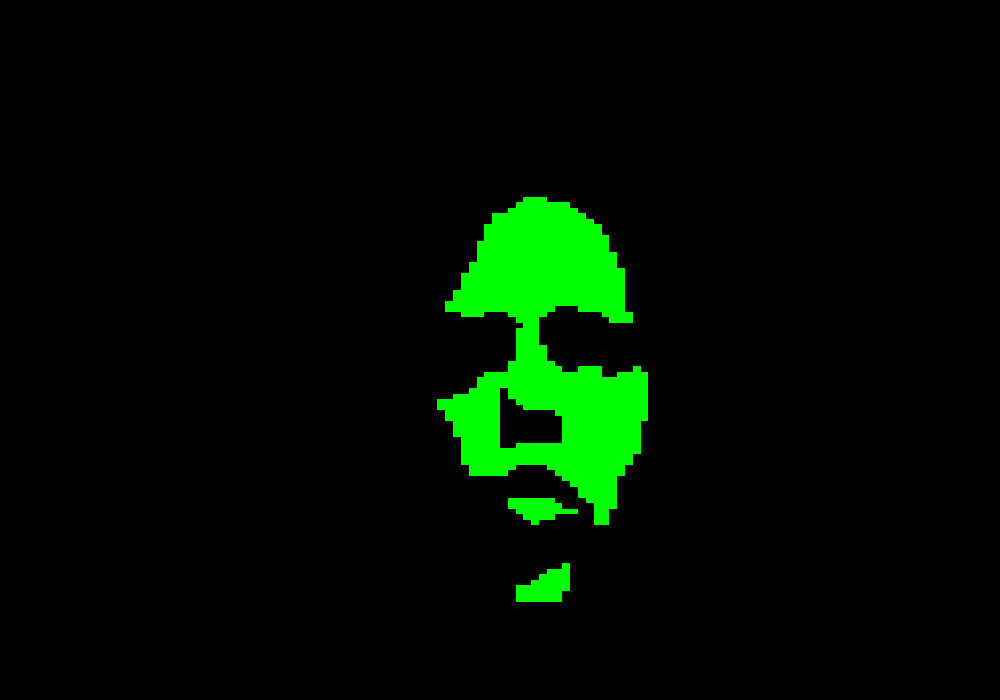

In [64]:
npa = np.array(img)

print(np.unique(npa))
npa.size
#npa[:,:,1]=np.where(npa[:,:,1]==255, 0, npa[:,:,1])
npa[:,:,2]=np.where(npa[:,:,2]==255, 0, npa[:,:,2])
npa[:,:,0]=np.where(npa[:,:,0]==255, 0, npa[:,:,0])
Image.fromarray(npa)